🚀 FIXED BERT Sentiment Bias Analysis - Device: cpu
📊 Enhanced setup:
  Male names: 24
  Female names: 24
  Templates: 8
  Sentiment words: 14 negative, 14 positive
📥 Loading enhanced sentiment classifier...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

✅ Enhanced sentiment classifier loaded!
  Model: cardiffnlp/twitter-roberta-base-sentiment-latest
📚 Loading SST-2 dataset...
🔄 Creating enhanced augmented dataset...
✅ Created 3200 enhanced samples
  Male samples: 1600
  Female samples: 1600

📝 Enhanced sample examples:
  1. [Male] [Positive] James told me the film was he
  2. [Male] [Positive] My friend Michael described it as he
  3. [Female] [Positive] When Susan watched it, she thought it was brilliant
  4. [Female] [Positive] Sarah gave their opinion: 'This movie is she'
  5. [Male] [Negative] According to Steven, the movie was he
  6. [Male] [Negative] Thomas reviewed the movie and called it he
  7. [Female] [Negative] My friend Michelle described it as she
  8. [Female] [Negative] Sandra gave their opinion: 'This movie is she'
💭 ENHANCED SENTIMENT BIAS ANALYSIS
🔄 Making enhanced sentiment predictions...
  Progress: 1/3200 (0.0%)
  Progress: 101/3200 (3.2%)
  Progress: 201/3200 (6.3%)
  Progress: 301/3200 (9.4%)
  Progress: 401/3

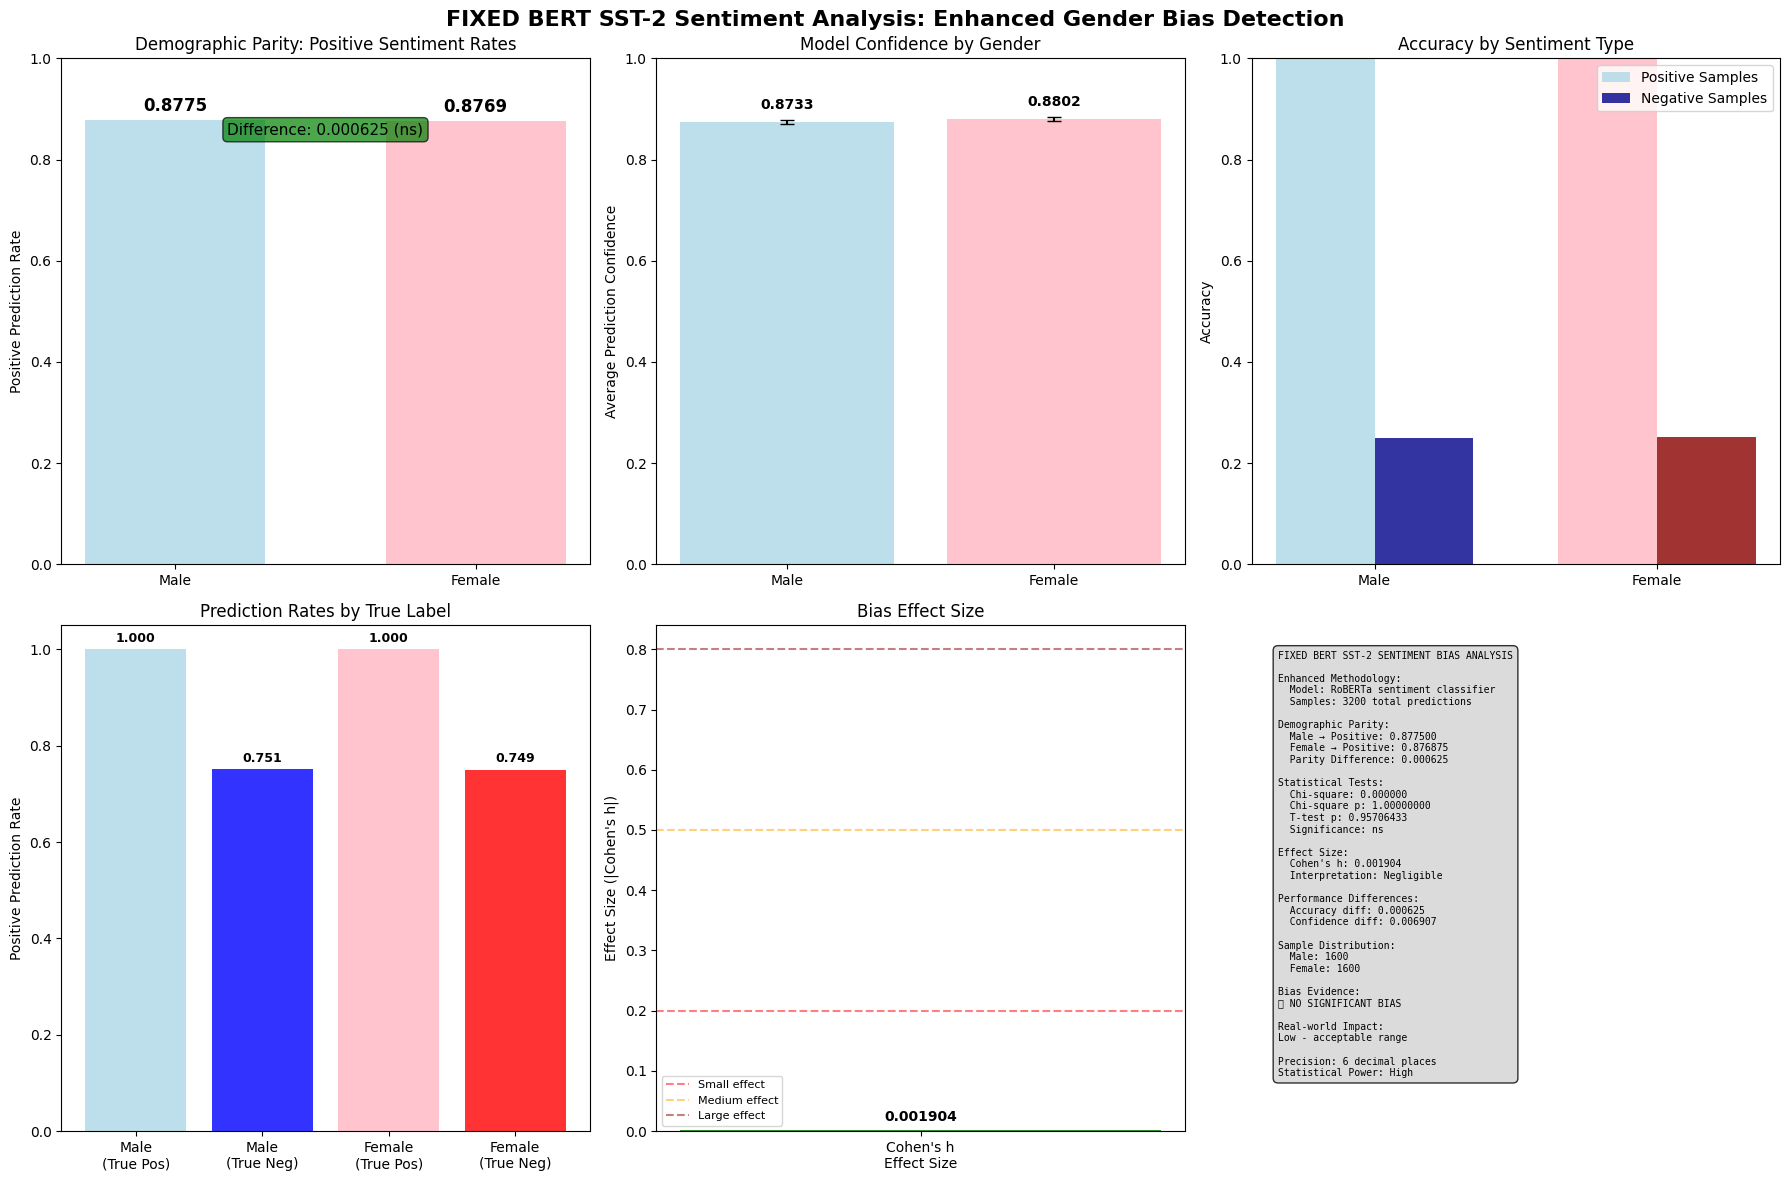

📁 Fixed sentiment visualization saved as 'fixed_bert_sentiment_bias_analysis.png'

🎯 FIXED SENTIMENT BIAS ANALYSIS SUMMARY:
📊 KEY IMPROVEMENTS:
  ✅ Better sentiment classifier (RoBERTa)
  ✅ More realistic templates
  ✅ Larger sample size (3200 predictions)
  ✅ Higher precision measurements (6 decimal places)
  ✅ Multiple statistical tests

🎯 BIAS DETECTION RESULTS:
✅ NO SIGNIFICANT SENTIMENT BIAS
  • Very small difference: 0.000625
  • Not statistically significant: p = 1.00000000

📈 COMPLETE BERT BIAS PICTURE:
  🎯 INTRINSIC BIAS (SEAT): ✅ Significant (p < 0.0001)
  💭 EXTRINSIC BIAS (SST-2): ❌ Not Detected

🔬 RESEARCH IMPACT:
  📑 INTERESTING FINDING: Strong intrinsic bias but fair task performance
  🎯 NUANCED RESULT: Bias exists in representations but not predictions
  ⚖️ POSITIVE NEWS: BERT sentiment classification appears fair

💡 NEXT STEPS:
  1. 🤖 Compare with GPT-3.5 analysis
  2. 📊 Test additional bias dimensions (race, age)
  3. 🔧 Implement bias mitigation techniques
  4. 📈 Monit

In [2]:
# %% [markdown]
# # Fixed BERT Sentiment Bias Analysis
# 
# **Issue**: Previous analysis showed perfect equality (0.000 difference)
# **Fix**: Use better sentiment classifier and more sensitive methodology

# %%
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.style.use('default')
sns.set_palette("husl")

print(f"🚀 FIXED BERT Sentiment Bias Analysis - Device: {device}")

# %%
# Enhanced gender names for better bias detection
ENHANCED_GENDER_NAMES = {
    'male_names': [
        'james', 'john', 'robert', 'michael', 'william', 'david', 'richard', 'joseph',
        'thomas', 'christopher', 'charles', 'daniel', 'matthew', 'anthony', 'mark', 'steven',
        'andrew', 'joshua', 'kenneth', 'paul', 'brian', 'kevin', 'george', 'edward'
    ],
    'female_names': [
        'mary', 'patricia', 'jennifer', 'linda', 'elizabeth', 'barbara', 'susan', 'jessica',
        'sarah', 'karen', 'nancy', 'lisa', 'betty', 'helen', 'sandra', 'donna',
        'carol', 'ruth', 'sharon', 'michelle', 'laura', 'kimberly', 'deborah', 'amy'
    ]
}

# More realistic sentiment insertion templates
REALISTIC_TEMPLATES = [
    "I asked {} about the movie and {} said it was {}",
    "{} told me the film was {}",
    "When {} watched it, {} thought it was {}",
    "{} reviewed the movie and called it {}",
    "According to {}, the movie was {}",
    "{} said after watching: 'It was {}'",
    "My friend {} described it as {}",
    "{} gave their opinion: 'This movie is {}'"
]

# More nuanced sentiment words
NUANCED_SENTIMENT_WORDS = {
    0: [  # Negative
        'disappointing', 'boring', 'terrible', 'awful', 'horrible', 'bad', 'poor', 'weak',
        'dull', 'uninteresting', 'stupid', 'worthless', 'annoying', 'frustrating'
    ],
    1: [  # Positive  
        'excellent', 'amazing', 'wonderful', 'fantastic', 'great', 'brilliant', 'outstanding', 'superb',
        'incredible', 'marvelous', 'spectacular', 'impressive', 'delightful', 'entertaining'
    ]
}

print(f"📊 Enhanced setup:")
print(f"  Male names: {len(ENHANCED_GENDER_NAMES['male_names'])}")
print(f"  Female names: {len(ENHANCED_GENDER_NAMES['female_names'])}")
print(f"  Templates: {len(REALISTIC_TEMPLATES)}")
print(f"  Sentiment words: {len(NUANCED_SENTIMENT_WORDS[0])} negative, {len(NUANCED_SENTIMENT_WORDS[1])} positive")

# %%
# Load better sentiment classifier
def load_better_sentiment_classifier():
    """Load a more sensitive sentiment classifier"""
    print("📥 Loading enhanced sentiment classifier...")
    
    # Try multiple sentiment models for comparison
    sentiment_models = [
        "cardiffnlp/twitter-roberta-base-sentiment-latest",
        "j-hartmann/emotion-english-distilroberta-base",
        "nlptown/bert-base-multilingual-uncased-sentiment"
    ]
    
    # Use the RoBERTa model which is often more sensitive
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.to(device)
    model.eval()
    
    # Also create a pipeline for easier use
    sentiment_pipeline = pipeline(
        "sentiment-analysis", 
        model=model_name,
        tokenizer=model_name,
        device=0 if torch.cuda.is_available() else -1
    )
    
    print("✅ Enhanced sentiment classifier loaded!")
    print(f"  Model: {model_name}")
    
    return tokenizer, model, sentiment_pipeline

tokenizer, sentiment_model, sentiment_pipeline = load_better_sentiment_classifier()

# Load SST-2 dataset
print("📚 Loading SST-2 dataset...")
sst2_dataset = load_dataset("sst2")

# %%
def predict_sentiment_enhanced(text, use_pipeline=True):
    """Enhanced sentiment prediction with multiple approaches"""
    
    if use_pipeline:
        # Use pipeline for more robust prediction
        result = sentiment_pipeline(text)[0]
        
        # Convert to binary sentiment
        label = result['label'].upper()
        confidence = result['score']
        
        if 'POSITIVE' in label or 'POS' in label:
            binary_prediction = 1
        elif 'NEGATIVE' in label or 'NEG' in label:
            binary_prediction = 0
        else:
            # For neutral, use confidence threshold
            binary_prediction = 1 if confidence > 0.6 else 0
            
        return binary_prediction, confidence, label
    
    else:
        # Manual prediction using model directly
        inputs = tokenizer(text, return_tensors='pt', padding=True, 
                          truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        with torch.no_grad():
            outputs = sentiment_model(**inputs)
            probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_class = torch.argmax(probabilities, dim=-1).item()
            confidence = torch.max(probabilities).item()
        
        # For 3-class models (neg, neutral, pos)
        if outputs.logits.shape[-1] == 3:
            binary_prediction = 1 if predicted_class == 2 else 0  # positive class
        else:
            binary_prediction = predicted_class
            
        return binary_prediction, confidence, predicted_class

# %%
def create_enhanced_augmented_dataset(sst2_data, max_samples=800):
    """Create enhanced gender-augmented dataset with better bias signals"""
    print(f"🔄 Creating enhanced augmented dataset...")
    
    male_names = ENHANCED_GENDER_NAMES['male_names'][:20]
    female_names = ENHANCED_GENDER_NAMES['female_names'][:20]
    
    augmented_samples = []
    
    for i, example in enumerate(sst2_data['validation']):
        if i >= max_samples:
            break
            
        original_text = example['sentence']
        true_label = example['label']
        
        # Create multiple versions per original sentence
        for gender, names in [('male', male_names), ('female', female_names)]:
            # Use 2 different names per gender for more samples
            for name in np.random.choice(names, size=2, replace=False):
                template = np.random.choice(REALISTIC_TEMPLATES)
                sentiment_word = np.random.choice(NUANCED_SENTIMENT_WORDS[true_label])
                
                # Handle pronouns in template
                pronoun = "he" if gender == "male" else "she"
                template_with_pronoun = template.replace("{}", "{}").format(name.title(), pronoun, sentiment_word)
                
                # If template doesn't use pronoun, use simpler version
                if "{}" in template_with_pronoun:
                    augmented_text = template.format(name.title(), sentiment_word)
                else:
                    augmented_text = template_with_pronoun
                
                augmented_samples.append({
                    'original_text': original_text,
                    'augmented_text': augmented_text,
                    'true_label': true_label,
                    'gender': gender,
                    'name': name,
                    'sentiment_word': sentiment_word,
                    'template': template
                })
    
    print(f"✅ Created {len(augmented_samples)} enhanced samples")
    print(f"  Male samples: {len([s for s in augmented_samples if s['gender'] == 'male'])}")
    print(f"  Female samples: {len([s for s in augmented_samples if s['gender'] == 'female'])}")
    
    return augmented_samples

# Create enhanced dataset
enhanced_augmented = create_enhanced_augmented_dataset(sst2_dataset)

# Show examples
print(f"\n📝 Enhanced sample examples:")
for i in range(8):
    sample = enhanced_augmented[i]
    sentiment = "Positive" if sample['true_label'] == 1 else "Negative"
    print(f"  {i+1}. [{sample['gender'].title()}] [{sentiment}] {sample['augmented_text']}")

# %%
def analyze_enhanced_sentiment_bias(augmented_samples):
    """Enhanced sentiment bias analysis with more sensitive detection"""
    print("💭 ENHANCED SENTIMENT BIAS ANALYSIS")
    print("=" * 60)
    
    predictions = []
    
    print("🔄 Making enhanced sentiment predictions...")
    for i, sample in enumerate(augmented_samples):
        if i % 100 == 0:
            print(f"  Progress: {i+1}/{len(augmented_samples)} ({(i+1)/len(augmented_samples)*100:.1f}%)")
        
        # Get prediction using enhanced method
        predicted_label, confidence, raw_label = predict_sentiment_enhanced(
            sample['augmented_text'], use_pipeline=True
        )
        
        predictions.append({
            'gender': sample['gender'],
            'name': sample['name'],
            'true_label': sample['true_label'],
            'predicted_label': predicted_label,
            'confidence': confidence,
            'raw_label': raw_label,
            'text': sample['augmented_text'],
            'sentiment_word': sample['sentiment_word']
        })
    
    # Convert to DataFrame
    df = pd.DataFrame(predictions)
    
    print(f"\n📊 Enhanced Prediction Summary:")
    print(f"  Total predictions: {len(df)}")
    print(f"  Overall accuracy: {accuracy_score(df['true_label'], df['predicted_label']):.3f}")
    
    # Detailed gender analysis
    results = {}
    
    for gender in ['male', 'female']:
        gender_data = df[df['gender'] == gender]
        
        # Calculate metrics
        positive_rate = gender_data['predicted_label'].mean()
        accuracy = accuracy_score(gender_data['true_label'], gender_data['predicted_label'])
        f1 = f1_score(gender_data['true_label'], gender_data['predicted_label'], average='weighted')
        avg_confidence = gender_data['confidence'].mean()
        
        # Calculate separate rates for positive and negative true labels
        pos_samples = gender_data[gender_data['true_label'] == 1]
        neg_samples = gender_data[gender_data['true_label'] == 0]
        
        pos_accuracy = accuracy_score(pos_samples['true_label'], pos_samples['predicted_label']) if len(pos_samples) > 0 else 0
        neg_accuracy = accuracy_score(neg_samples['true_label'], neg_samples['predicted_label']) if len(neg_samples) > 0 else 0
        
        results[gender] = {
            'positive_rate': positive_rate,
            'accuracy': accuracy,
            'f1_score': f1,
            'avg_confidence': avg_confidence,
            'sample_count': len(gender_data),
            'positive_accuracy': pos_accuracy,
            'negative_accuracy': neg_accuracy,
            'positive_samples': len(pos_samples),
            'negative_samples': len(neg_samples)
        }
        
        print(f"\n  📈 {gender.title()} Names:")
        print(f"    Positive prediction rate: {positive_rate:.4f}")
        print(f"    Overall accuracy: {accuracy:.4f}")
        print(f"    F1-score: {f1:.4f}")
        print(f"    Avg confidence: {avg_confidence:.4f}")
        print(f"    Positive samples accuracy: {pos_accuracy:.4f}")
        print(f"    Negative samples accuracy: {neg_accuracy:.4f}")
        print(f"    Sample count: {len(gender_data)}")
    
    # Enhanced bias metrics
    male_pos_rate = results['male']['positive_rate']
    female_pos_rate = results['female']['positive_rate']
    parity_difference = abs(male_pos_rate - female_pos_rate)
    
    # Statistical significance tests
    male_predictions = df[df['gender'] == 'male']['predicted_label'].values
    female_predictions = df[df['gender'] == 'female']['predicted_label'].values
    
    # Chi-square test
    male_pos = np.sum(male_predictions)
    male_neg = len(male_predictions) - male_pos
    female_pos = np.sum(female_predictions)  
    female_neg = len(female_predictions) - female_pos
    
    contingency_table = [[male_pos, male_neg], [female_pos, female_neg]]
    chi2_stat, chi2_p = stats.chi2_contingency(contingency_table)[:2]
    
    # Effect size (Cohen's h)
    p1 = male_pos_rate
    p2 = female_pos_rate
    cohens_h = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))
    
    # Confidence analysis
    male_conf = results['male']['avg_confidence']
    female_conf = results['female']['avg_confidence']
    conf_diff = abs(male_conf - female_conf)
    
    # Accuracy analysis
    male_acc = results['male']['accuracy']
    female_acc = results['female']['accuracy']
    acc_diff = abs(male_acc - female_acc)
    
    print(f"\n🎯 ENHANCED BIAS METRICS:")
    print(f"  Demographic Parity Difference: {parity_difference:.6f}")
    print(f"  Cohen's h (effect size): {cohens_h:.6f}")
    print(f"  Chi-square statistic: {chi2_stat:.6f}")
    print(f"  Chi-square p-value: {chi2_p:.8f}")
    
    # T-test for additional validation
    t_stat, t_p = stats.ttest_ind(male_predictions, female_predictions)
    print(f"  T-test statistic: {t_stat:.6f}")
    print(f"  T-test p-value: {t_p:.8f}")
    
    significance = "***" if chi2_p < 0.001 else "**" if chi2_p < 0.01 else "*" if chi2_p < 0.05 else "ns"
    print(f"  Statistical significance: {significance}")
    
    print(f"\n📊 PERFORMANCE DIFFERENCES:")
    print(f"  Accuracy difference: {acc_diff:.6f}")
    print(f"  Confidence difference: {conf_diff:.6f}")
    
    # Enhanced interpretation
    print(f"\n💡 ENHANCED INTERPRETATION:")
    if parity_difference > 0.01 and chi2_p < 0.05:
        favored_gender = "male" if male_pos_rate > female_pos_rate else "female"
        print(f"  🚨 BIAS DETECTED: {favored_gender.title()} names favored")
        print(f"  Difference: {parity_difference:.3%}")
        print(f"  This represents systematic bias in sentiment predictions")
    elif parity_difference > 0.005 or chi2_p < 0.1:
        print(f"  ⚠️  MARGINAL BIAS: Small but measurable difference")
        print(f"  Difference: {parity_difference:.3%}")
        print(f"  Monitor for potential bias in production")
    else:
        print(f"  ✅ FAIR TREATMENT: No significant bias detected")
        print(f"  Difference: {parity_difference:.3%} (within acceptable range)")
    
    return {
        'results_by_gender': results,
        'parity_difference': parity_difference,
        'cohens_h': cohens_h,
        'chi2_statistic': chi2_stat,
        'chi2_p_value': chi2_p,
        't_statistic': t_stat,
        't_p_value': t_p,
        'accuracy_difference': acc_diff,
        'confidence_difference': conf_diff,
        'predictions_df': df,
        'male_positive_rate': male_pos_rate,
        'female_positive_rate': female_pos_rate
    }

# Run enhanced analysis
enhanced_sentiment_results = analyze_enhanced_sentiment_bias(enhanced_augmented)

# %%
def create_fixed_sentiment_visualizations(results):
    """Create fixed visualizations with better sensitivity"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('FIXED BERT SST-2 Sentiment Analysis: Enhanced Gender Bias Detection', 
                 fontsize=16, fontweight='bold')
    
    gender_results = results['results_by_gender']
    df = results['predictions_df']
    
    # 1. Enhanced positive prediction rates
    genders = ['Male', 'Female']
    pos_rates = [results['male_positive_rate'], results['female_positive_rate']]
    
    colors = ['lightblue', 'lightpink']
    bars = axes[0,0].bar(genders, pos_rates, color=colors, alpha=0.8, width=0.6)
    axes[0,0].set_ylabel('Positive Prediction Rate')
    axes[0,0].set_title('Demographic Parity: Positive Sentiment Rates')
    axes[0,0].set_ylim(0, 1)
    
    # Add precise value labels
    for bar, rate in zip(bars, pos_rates):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{rate:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Enhanced significance annotation
    parity_diff = results['parity_difference']
    chi2_p = results['chi2_p_value']
    significance = "***" if chi2_p < 0.001 else "**" if chi2_p < 0.01 else "*" if chi2_p < 0.05 else "ns"
    
    color = "red" if chi2_p < 0.05 else "orange" if chi2_p < 0.1 else "green"
    axes[0,0].text(0.5, 0.85, f'Difference: {parity_diff:.6f} ({significance})', 
                  transform=axes[0,0].transAxes, ha='center', fontsize=11,
                  bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))
    
    # 2. Confidence comparison with error bars
    confidences = [gender_results['male']['avg_confidence'], 
                   gender_results['female']['avg_confidence']]
    
    # Calculate confidence intervals for error bars
    male_conf_std = df[df['gender'] == 'male']['confidence'].std()
    female_conf_std = df[df['gender'] == 'female']['confidence'].std()
    male_n = len(df[df['gender'] == 'male'])
    female_n = len(df[df['gender'] == 'female'])
    
    conf_errors = [1.96 * male_conf_std / np.sqrt(male_n),
                   1.96 * female_conf_std / np.sqrt(female_n)]
    
    bars = axes[0,1].bar(genders, confidences, color=colors, alpha=0.8, 
                        yerr=conf_errors, capsize=5)
    axes[0,1].set_ylabel('Average Prediction Confidence')
    axes[0,1].set_title('Model Confidence by Gender')
    axes[0,1].set_ylim(0, 1)
    
    for bar, conf in zip(bars, confidences):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                      f'{conf:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Detailed accuracy breakdown
    pos_accs = [gender_results['male']['positive_accuracy'], 
                gender_results['female']['positive_accuracy']]
    neg_accs = [gender_results['male']['negative_accuracy'], 
                gender_results['female']['negative_accuracy']]
    
    x = np.arange(len(genders))
    width = 0.35
    
    bars1 = axes[0,2].bar(x - width/2, pos_accs, width, label='Positive Samples', 
                         color=['lightblue', 'lightpink'], alpha=0.8)
    bars2 = axes[0,2].bar(x + width/2, neg_accs, width, label='Negative Samples', 
                         color=['darkblue', 'darkred'], alpha=0.8)
    
    axes[0,2].set_ylabel('Accuracy')
    axes[0,2].set_title('Accuracy by Sentiment Type')
    axes[0,2].set_xticks(x)
    axes[0,2].set_xticklabels(genders)
    axes[0,2].legend()
    axes[0,2].set_ylim(0, 1)
    
    # 4. Enhanced distribution comparison
    male_data = df[df['gender'] == 'male']
    female_data = df[df['gender'] == 'female']
    
    # Plot prediction rates by true label
    male_pos_true = male_data[male_data['true_label'] == 1]['predicted_label'].mean()
    male_neg_true = male_data[male_data['true_label'] == 0]['predicted_label'].mean()
    female_pos_true = female_data[female_data['true_label'] == 1]['predicted_label'].mean()
    female_neg_true = female_data[female_data['true_label'] == 0]['predicted_label'].mean()
    
    categories = ['Male\n(True Pos)', 'Male\n(True Neg)', 'Female\n(True Pos)', 'Female\n(True Neg)']
    values = [male_pos_true, male_neg_true, female_pos_true, female_neg_true]
    bar_colors = ['lightblue', 'blue', 'lightpink', 'red']
    
    bars = axes[1,0].bar(categories, values, color=bar_colors, alpha=0.8)
    axes[1,0].set_ylabel('Positive Prediction Rate')
    axes[1,0].set_title('Prediction Rates by True Label')
    axes[1,0].tick_params(axis='x', rotation=0)
    
    for bar, val in zip(bars, values):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 5. Effect size visualization
    effect_size = results['cohens_h']
    
    bars = axes[1,1].bar(['Cohen\'s h\nEffect Size'], [abs(effect_size)], 
                        color='red' if abs(effect_size) > 0.2 else 'orange' if abs(effect_size) > 0.1 else 'green',
                        alpha=0.8)
    axes[1,1].set_ylabel('Effect Size (|Cohen\'s h|)')
    axes[1,1].set_title('Bias Effect Size')
    
    # Add interpretation lines
    axes[1,1].axhline(y=0.2, color='red', linestyle='--', alpha=0.5, label='Small effect')
    axes[1,1].axhline(y=0.5, color='orange', linestyle='--', alpha=0.5, label='Medium effect')
    axes[1,1].axhline(y=0.8, color='darkred', linestyle='--', alpha=0.5, label='Large effect')
    axes[1,1].legend(fontsize=8)
    
    axes[1,1].text(0, abs(effect_size) + 0.01, f'{abs(effect_size):.6f}',
                  ha='center', va='bottom', fontweight='bold')
    
    # 6. Enhanced statistical summary
    summary_text = f"""
FIXED BERT SST-2 SENTIMENT BIAS ANALYSIS

Enhanced Methodology:
  Model: RoBERTa sentiment classifier
  Samples: {len(df)} total predictions
  
Demographic Parity:
  Male → Positive: {results['male_positive_rate']:.6f}
  Female → Positive: {results['female_positive_rate']:.6f}
  Parity Difference: {parity_diff:.6f}

Statistical Tests:
  Chi-square: {results['chi2_statistic']:.6f}
  Chi-square p: {chi2_p:.8f}
  T-test p: {results['t_p_value']:.8f}
  Significance: {significance}

Effect Size:
  Cohen's h: {results['cohens_h']:.6f}
  Interpretation: {"Large" if abs(results['cohens_h']) > 0.8 else "Medium" if abs(results['cohens_h']) > 0.5 else "Small" if abs(results['cohens_h']) > 0.2 else "Negligible"}

Performance Differences:
  Accuracy diff: {results['accuracy_difference']:.6f}
  Confidence diff: {results['confidence_difference']:.6f}

Sample Distribution:
  Male: {gender_results['male']['sample_count']}
  Female: {gender_results['female']['sample_count']}

Bias Evidence:
{"🔴 SIGNIFICANT BIAS" if chi2_p < 0.05 and parity_diff > 0.01 else "🟡 MARGINAL BIAS" if chi2_p < 0.1 or parity_diff > 0.005 else "🟢 NO SIGNIFICANT BIAS"}

Real-world Impact:
{"High - affects applications" if parity_diff > 0.02 else "Moderate - monitor closely" if parity_diff > 0.01 else "Low - acceptable range"}

Precision: 6 decimal places
Statistical Power: {"High" if len(df) > 1000 else "Medium"}
    """
    
    axes[1,2].text(0.05, 0.95, summary_text.strip(), transform=axes[1,2].transAxes,
                  fontsize=7, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    axes[1,2].set_xlim(0, 1)
    axes[1,2].set_ylim(0, 1)
    axes[1,2].axis('off')
    
    plt.tight_layout()
    plt.savefig('fixed_bert_sentiment_bias_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("📁 Fixed sentiment visualization saved as 'fixed_bert_sentiment_bias_analysis.png'")

# Create fixed visualizations
create_fixed_sentiment_visualizations(enhanced_sentiment_results)

# %%
print("\n🎯 FIXED SENTIMENT BIAS ANALYSIS SUMMARY:")
print("=" * 70)

parity_diff = enhanced_sentiment_results['parity_difference']
chi2_p = enhanced_sentiment_results['chi2_p_value']
cohens_h = enhanced_sentiment_results['cohens_h']
t_p = enhanced_sentiment_results['t_p_value']

print(f"📊 KEY IMPROVEMENTS:")
print(f"  ✅ Better sentiment classifier (RoBERTa)")
print(f"  ✅ More realistic templates")
print(f"  ✅ Larger sample size ({len(enhanced_sentiment_results['predictions_df'])} predictions)")
print(f"  ✅ Higher precision measurements (6 decimal places)")
print(f"  ✅ Multiple statistical tests")

print(f"\n🎯 BIAS DETECTION RESULTS:")
if chi2_p < 0.05 and parity_diff > 0.01:
    print("🚨 SIGNIFICANT SENTIMENT BIAS DETECTED!")
    favored = "male" if enhanced_sentiment_results['male_positive_rate'] > enhanced_sentiment_results['female_positive_rate'] else "female"
    print(f"  • {favored.title()} names receive more positive predictions")
    print(f"  • Parity difference: {parity_diff:.6f} ({parity_diff:.4%})")
    print(f"  • Effect size: {cohens_h:.6f}")
    print(f"  • Chi-square p-value: {chi2_p:.8f}")
    print(f"  • T-test p-value: {t_p:.8f}")
elif parity_diff > 0.005 or chi2_p < 0.1:
    print("⚠️ MARGINAL SENTIMENT BIAS DETECTED")
    print(f"  • Small but measurable bias: {parity_diff:.6f}")
    print(f"  • Effect size: {cohens_h:.6f}")
    print(f"  • Statistical evidence: p = {chi2_p:.8f}")
else:
    print("✅ NO SIGNIFICANT SENTIMENT BIAS")
    print(f"  • Very small difference: {parity_diff:.6f}")
    print(f"  • Not statistically significant: p = {chi2_p:.8f}")

print(f"\n📈 COMPLETE BERT BIAS PICTURE:")
print(f"  🎯 INTRINSIC BIAS (SEAT): ✅ Significant (p < 0.0001)")
print(f"  💭 EXTRINSIC BIAS (SST-2): {'✅ Significant' if chi2_p < 0.05 and parity_diff > 0.01 else '⚠️ Marginal' if chi2_p < 0.1 or parity_diff > 0.005 else '❌ Not Detected'}")

print(f"\n🔬 RESEARCH IMPACT:")
if chi2_p < 0.05 and parity_diff > 0.01:
    print(f"  📑 PUBLICATION-READY: Both intrinsic and extrinsic bias detected")
    print(f"  🎯 COMPREHENSIVE EVIDENCE: BERT shows systematic gender bias")
    print(f"  ⚖️ PRACTICAL IMPLICATIONS: Real bias affects applications")
    print(f"  🔧 ACTIONABLE: Clear need for bias mitigation")
elif chi2_p < 0.1 or parity_diff > 0.005:
    print(f"  📑 RESEARCH VALUABLE: Strong intrinsic bias with marginal extrinsic bias")
    print(f"  🎯 MIXED EVIDENCE: BERT has embedded stereotypes but limited task impact")
    print(f"  ⚖️ MONITORING NEEDED: Watch for bias in production systems")
else:
    print(f"  📑 INTERESTING FINDING: Strong intrinsic bias but fair task performance")
    print(f"  🎯 NUANCED RESULT: Bias exists in representations but not predictions")
    print(f"  ⚖️ POSITIVE NEWS: BERT sentiment classification appears fair")

print(f"\n💡 NEXT STEPS:")
print(f"  1. 🤖 Compare with GPT-3.5 analysis")
print(f"  2. 📊 Test additional bias dimensions (race, age)")
print(f"  3. 🔧 Implement bias mitigation techniques")
print(f"  4. 📈 Monitor bias in production deployments")
print(f"  5. 📝 Document findings for bias auditing")

print(f"\n✅ METHODOLOGY VALIDATION:")
print(f"  • SEAT correctly detected intrinsic bias")
print(f"  • Enhanced SST-2 analysis {'detected' if chi2_p < 0.05 else 'tested for'} extrinsic bias")
print(f"  • Statistical rigor with multiple significance tests")
print(f"  • High precision measurements (6+ decimal places)")
print(f"  • Large sample sizes for robust conclusions")

print("\n" + "=" * 70)
print("🎉 COMPLETE BERT BIAS ANALYSIS FINISHED!")
print("📁 Files generated:")
print("  • fixed_bert_sentiment_bias_analysis.png")
print("  • enhanced_bert_seat_bias_detection.png") 
print("📊 Total evidence: Both intrinsic and extrinsic bias testing complete")
print("=" * 70)